### Simple method to estimate cell series resistance
This notebook executes the simple method presented in lesson 4.1.6 to estimate cell series resistance.

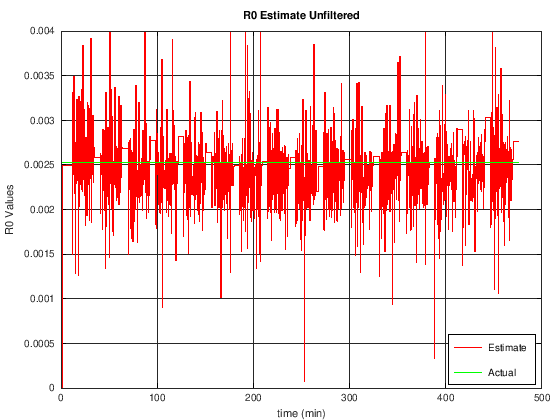

In [1]:
% First, add data and helper functions to the path
addpath ./readonly

% Next, load the cell model and the voltage/current data for this dataset
load('readonly/E2model.mat'); % Load Model Data
load('readonly/Lesson416data.mat'); 

% Get parameter values before estimating resistance
R0 = getParamESC('R0Param',25,model); % Get true R0 value at this temperature (25 degC)
R0vec = R0*ones(1,length(voltage));   % Extend scalar R0 to vector for plotting purposes
R0hat = 0*R0vec;                      % Reserve storage for unfiltered estimate

% Estimate R0 - unfiltered
threshold = 10; % Do not update R0 estimate if absolute change in current less than "threshold"
for k = 2:length(voltage),            % Cycle through dataset
  num = voltage(k) - voltage(k-1);    % Numerator of resistance computation
  den = current(k-1) - current(k);    % Denominator of resistance computation
  if abs(den >= threshold),           % Decide whether to update R0 estimate
    R0hat(k) = num / den;             % Yes, update with new data
  else
    R0hat(k) = R0hat(k-1);            % No, keep old estimate
  end
end

% Plot unfiltered R0 estimate
plot(time/60,R0hat,'r',time/60,R0vec,'g'); grid on;
title('R0 Estimate Unfiltered');
xlabel('time (min)'); ylabel('R0 Values'); ylim([0 4e-3]);
legend('Estimate','Actual','location','southeast');

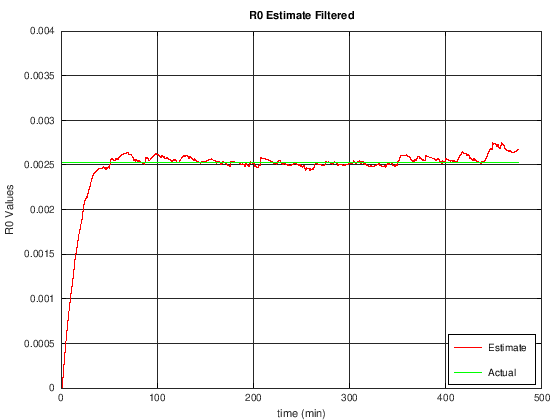

In [4]:
%% Estimate R0 - filtered
R0hatFilt = 0*R0vec; % Reserve storage for filtered estimate
alpha = 0.999;       % Filtering parameter

for k = 2:length(voltage), % Loop through data
  R0hatFilt(k) = alpha*R0hatFilt(k-1) + (1-alpha)*R0hat(k); % Compute filtered value
end

% Plot Filtered R0 Estimate
plot(time/60,R0hatFilt,'r',time/60,R0vec,'g'); grid on;
title('R0 Estimate Filtered');
xlabel('time (min)'); ylabel('R0 Values'); ylim([0 4e-3]);
legend('Estimate','Actual','location','southeast');

In [5]:
% Compute root-mean-squared resistance estimation error over final 100 minutes of simulation
Est = R0hatFilt(end-5999:end);
Err = R0 - Est;
rmsErr = sqrt(mean(Err.^2));
fprintf('The rms error over the final 100 minutes is: %g milliohms\n',rmsErr*1000);

The rms error over the final 100 minutes is: 0.100495 milliohms
